In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv('Comcast.csv')
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
data.shape

(2224, 11)

In [4]:
data[data.isna()].count()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
data['Date_month_year'] = pd.to_datetime(data['Date_month_year'])
data['month'] = pd.to_datetime(data['Date_month_year']).dt.month_name()
data['day'] = pd.to_datetime(data['Date_month_year']).dt.day
data['weekday'] = pd.to_datetime(data['Date_month_year']).dt.dayofweek
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,day,weekday
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,2
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4,1
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,5
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,5,6
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,1


In [6]:
data.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
month                                  object
day                                     int64
weekday                                 int64
dtype: object

#### Chart for the number of complaints at monthly levels

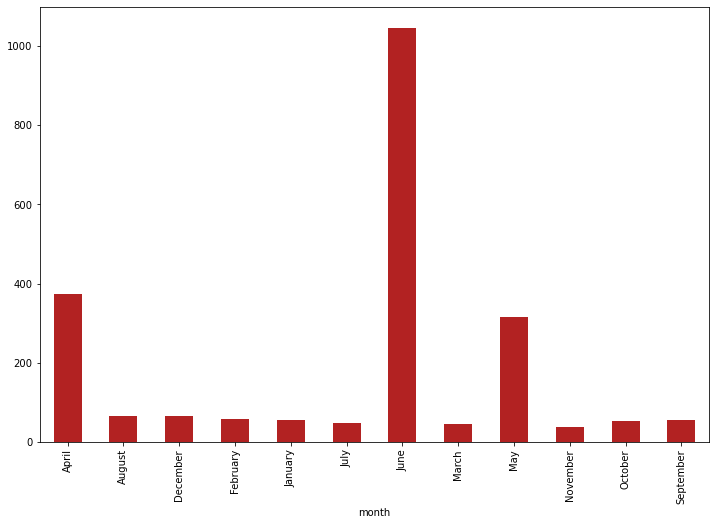

In [7]:
plt.figure(figsize = (12,8))
data.groupby(['month'])['Customer Complaint'].count().plot(kind= 'bar' , color = 'firebrick');

#### Chart for the number of complaints at daily levels

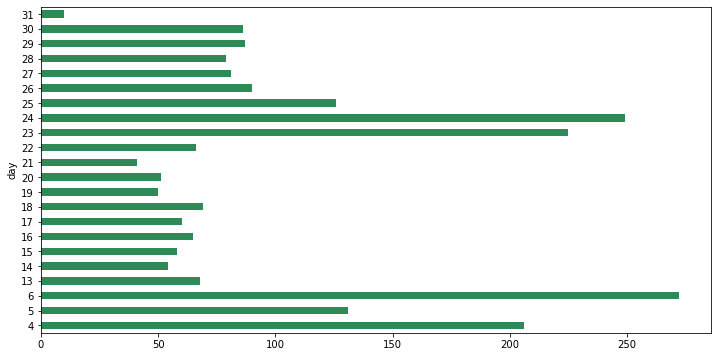

In [8]:
plt.figure(figsize = (12,6))
data.groupby(['day'])['Customer Complaint'].count().plot(kind = 'barh' , color = 'seagreen');

In [9]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,day,weekday
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,2
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4,1
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,5
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,5,6
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,1


In [10]:
data['Customer Complaint'] = data['Customer Complaint'].str.title()

data['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,102
1,Comcast Data Cap,30
2,Comcast Internet,29
3,Comcast Data Caps,21
4,Comcast Billing,18
...,...,...
1735,Monthly Data Caps,1
1736,"Comcast/Xfinity Poor Service, Fraudulent Billi...",1
1737,Lost Emails/Billing,1
1738,Improper Billing And Non Resolution Of Issues,1


In [11]:
data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

#### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [12]:
data['new_Status'] = data['Status'].apply(lambda x: 'Open' if((x == 'Pending') | (x == 'Open')) else 'Closed')
data['new_Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [13]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,day,weekday,new_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,2,Closed
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4,1,Closed
2,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,5,Closed
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,5,6,Open
4,307175,Comcast Not Working And No Service To Boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,1,Closed


In [14]:
data['new_Status'].isna().sum()

0

In [15]:
st_comp = data.groupby(['State','new_Status']).size().unstack().fillna(0)
st_comp.head()

new_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


In [16]:
st_comp['Closed'].head()

State
Alabama        17.0
Arizona        14.0
Arkansas        6.0
California    159.0
Colorado       58.0
Name: Closed, dtype: float64

In [17]:
st_comp.reset_index(inplace = True)
st_comp.head()

new_Status,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0


In [18]:
import warnings 
warnings.simplefilter('ignore')

#### Provide state wise status of complaints in a stacked bar chart

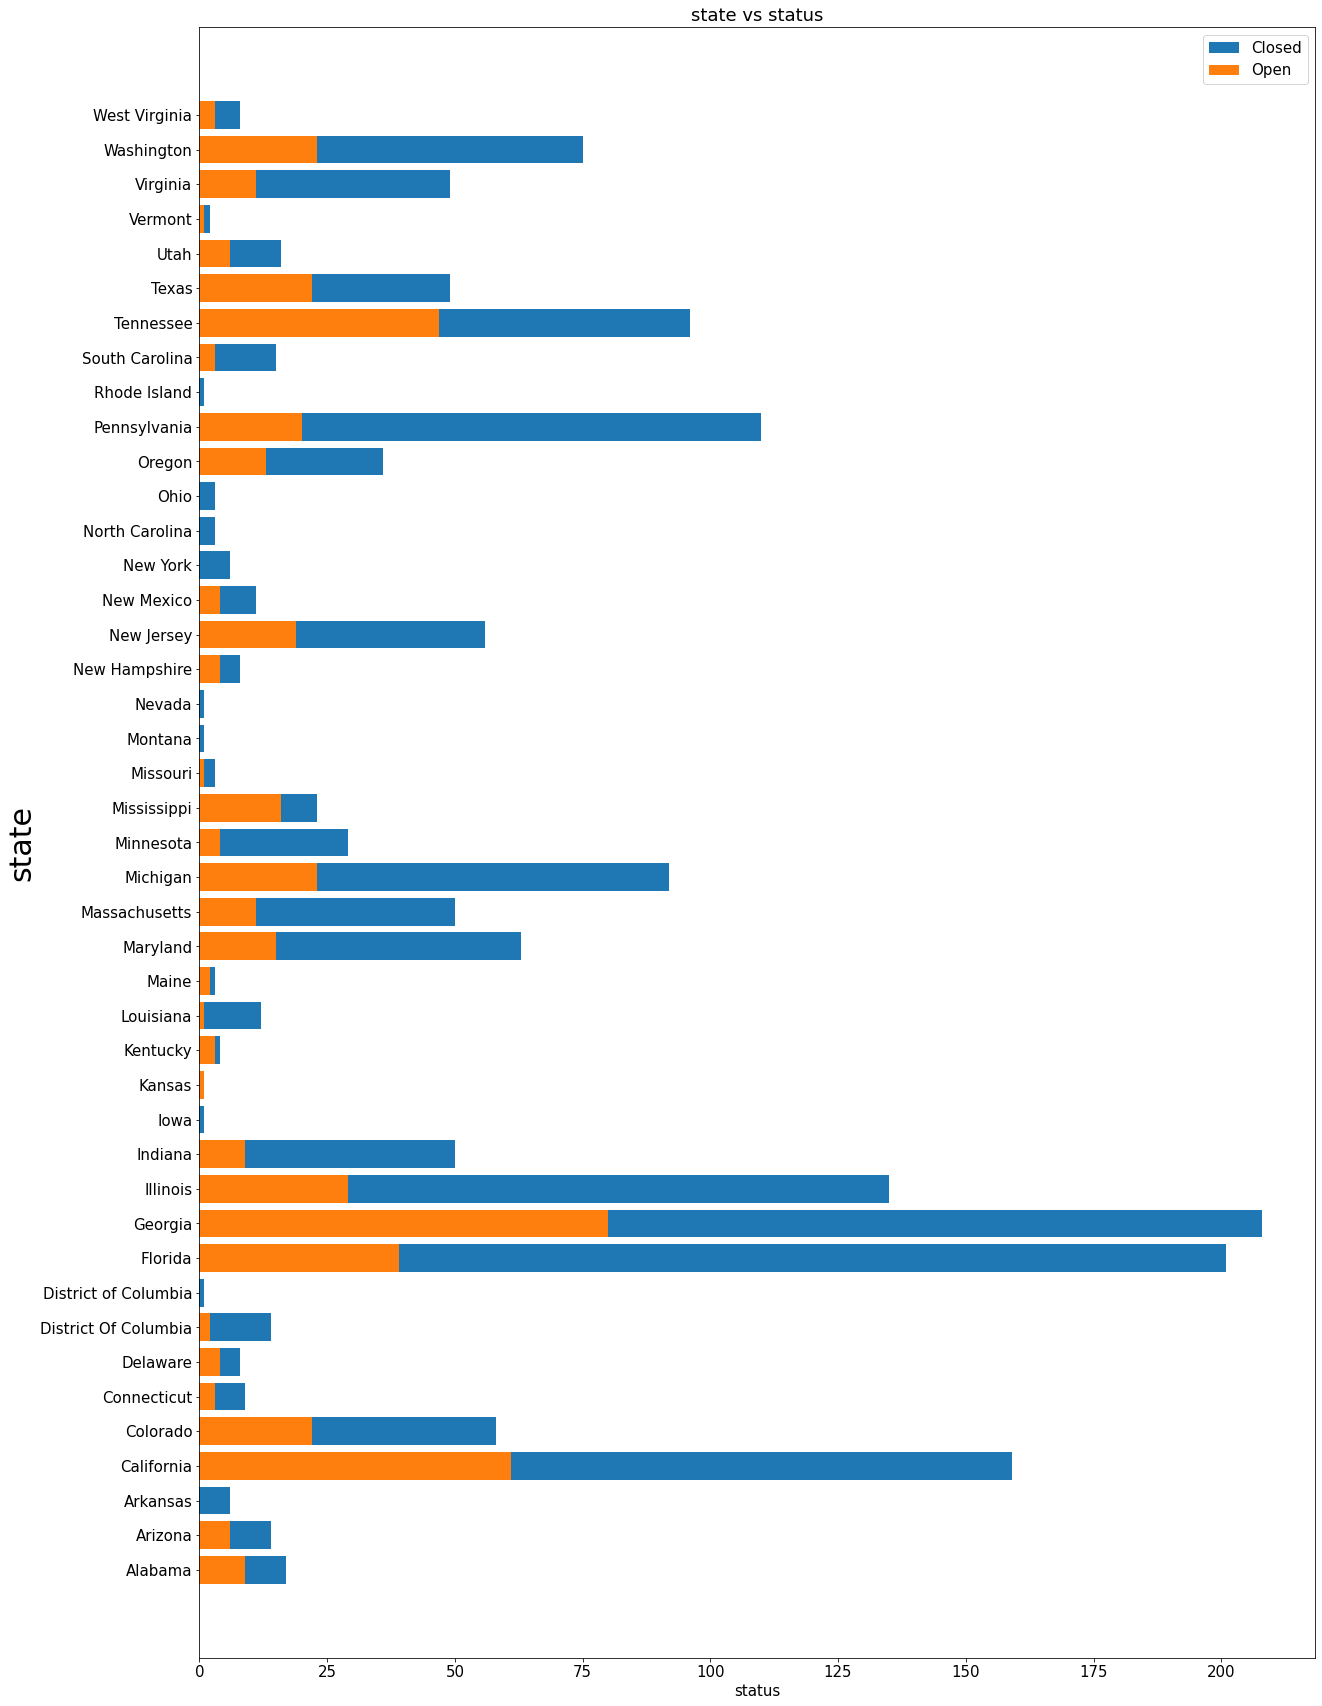

In [19]:
plt.figure(figsize=(20,30))
plt.rcParams.update({'font.size': 15})
plt.barh(st_comp['State'] , st_comp['Closed'])
plt.barh(st_comp['State'] , st_comp['Open'])
plt.xlabel('status')
plt.ylabel('state',size = 30)
plt.title('state vs status')
plt.legend(['Closed', 'Open'])
plt.show()

In [20]:
st_comp.head()

new_Status,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0


In [21]:
st_comp['total_complaint'] = st_comp['Closed'] + st_comp['Open']
st_comp.head()

new_Status,State,Closed,Open,total_complaint
0,Alabama,17.0,9.0,26.0
1,Arizona,14.0,6.0,20.0
2,Arkansas,6.0,0.0,6.0
3,California,159.0,61.0,220.0
4,Colorado,58.0,22.0,80.0


In [22]:
st_comp.sort_values('total_complaint' , ascending = False).head(1)

new_Status,State,Closed,Open,total_complaint
10,Georgia,208.0,80.0,288.0


##### Georgia has the maximum complaints

In [23]:
st_comp['percentage'] = (st_comp['Open']/st_comp['total_complaint'])*100
st_comp.sort_values('percentage' ,ascending= False).head()

new_Status,State,Closed,Open,total_complaint,percentage
14,Kansas,1.0,1.0,2.0,50.000000
15,Kentucky,4.0,3.0,7.0,42.857143
22,Mississippi,23.0,16.0,39.0,41.025641
17,Maine,3.0,2.0,5.0,40.000000
0,Alabama,17.0,9.0,26.0,34.615385


##### Kansas has maximum percentage of unresolved complaints

In [24]:
data['new_Status'].value_counts(normalize = True)

Closed    0.767536
Open      0.232464
Name: new_Status, dtype: float64

In [25]:
data.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,day,weekday,new_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,2,Closed
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4,1,Closed


####  The percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [26]:
data[data['new_Status']=='Closed']['Received Via'].value_counts(normalize =True).to_frame()

,Received Via
Customer Care Call,0.506151
Internet,0.493849
